#**Rotina de análise da Matriz Energética Brasileira**

O script vai realizar uma análise detalhada dos bancos de dados retirados de "data worldbank" e gerar gráficos explicativos, um relatório e enviará um email com estes compílados a quem interesse.

Bancos de dados utilizados:

https://data.worldbank.org/indicator/SP.POP.TOTL?view=chart

https://data.worldbank.org/indicator/EN.ATM.CO2E.PC?end=2018&start=1960&view=chart

https://data.worldbank.org/indicator/EN.ATM.METH.KT.CE?view=chart

https://data.worldbank.org/indicator/EG.USE.ELEC.KH.PC?view=chart

https://data.worldbank.org/indicator/EG.FEC.RNEW.ZS?view=chart

https://data.worldbank.org/indicator/EN.ATM.NOXE.KT.CE?view=chart

******https://data.worldbank.org/indicator

In [ ]:
# conecta o colab ao google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Cronometra o tempo de execução do programa
import time
start_script = time.time()

In [ ]:
# Importa as bibliotecas necessárias
from datetime import datetime, date
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from pathlib import Path


In [ ]:
!pip install folium==0.2.1
!pip install pdflatex
!sudo apt-get install texlive-latex-recommended 
!sudo apt install texlive-latex-extra
!sudo apt install dvipng


Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-latex-recommended is already the newest version (2017.20180305-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-latex-extra is already the newest version (2017.20180305-2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
dvipng is already the newest version (1.15-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [ ]:
# Instala pacotes de barra de progresso, para melhor visualização do progresso do script
#!pip install tqdm
#!pip install progressbar

In [ ]:
# importa o pacote de barra de progresso, para melhor visualização do progresso do script
from tqdm import tqdm

In [ ]:
!pip install pdf2image
!pip install poppler-utils
!pip install python-dateutil

!sudo apt-get install -y poppler-utils
!pip install --upgrade pdf2image 
from pdf2image import convert_from_path

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.12).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [ ]:

from pdflatex import PDFLaTeX
import pdflatex

from pdf2image import convert_from_path
from pdf2image.exceptions import (
PDFInfoNotInstalledError,
PDFPageCountError,
PDFSyntaxError
)

from IPython.display import display, Image



##**Biblioteca de Funções**

In [ ]:
def ler_csv(name_csv):
  df = pd.read_csv(bd_local + '/' + name_csv, header=0, sep = ',', skiprows=4, decimal='.')
  return df

In [ ]:
def formatar_titulo(text):
  words = text.split(" ")
  total_string = ""
  for counter, word in enumerate(words):
    if counter>0 and counter % 5 == 0:
      total_string +="\n{}".format(word)
    else:
      total_string +=" {}".format(word)
  return total_string.lstrip()

##**Imputs do Script**

In [ ]:
# Nome dos bancos de dados:
BD_POP = 'API_SP.POP.TOTL_DS2_en_csv_v2_3731322.csv'
BD_CO2 = 'API_EN.ATM.CO2E.PC_DS2_en_csv_v2_3731558.csv'
BD_MET = 'API_EN.ATM.METH.KT.CE_DS2_en_csv_v2_3733252.csv'
BD_NOX = 'API_EN.ATM.NOXE.KT.CE_DS2_en_csv_v2_3733279.csv'
BD_EPC = 'API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_3733258.csv' # Eletric Power Consumpion per Capita (KWh)
BD_REC = 'API_EG.FEC.RNEW.ZS_DS2_en_csv_v2_3753692.csv'

# Nome da pasta que estão os Bancos de Dados (BDs):
bd_local = '/content/drive/MyDrive/..Python Codes/Projeto Dashboard Matriz Energética/BD'

In [ ]:
##rascunho,
# dfr = ler_csv(BD_POP)
# dfr

In [ ]:
#rascunho
# indexBR = dfr.index[dfr['Country Name'] == 'Aruba']   # find BR index
# n = indexBR[0]
# df = dfr.iloc[n,:]
# df 

##**Rotina de Execução**

In [ ]:
# Lista de bancos de dados:
BD_list = [BD_POP,BD_CO2,BD_MET,BD_NOX,BD_EPC,BD_REC]
BD_df_list = []

for n in tqdm(BD_list):
  df = ler_csv(n)                                        # le o banco de dados respectivo
  indexBR = df.index[df['Country Name'] == 'Brazil'][0]  # encontra o index referente ao brasil
  df_BRtrat = pd.DataFrame(df.iloc[indexBR, :])          # separa a linha de dados do brasil em um dataframe separado
  df_BRtrat = df_BRtrat.transpose()                      # transpõe o dataframe para facilitara a visualização
  BD_df_list.append(df_BRtrat)                           # adiciona o dataframe criado à uma lista 


df = pd.DataFrame(BD_df_list[0])                      # inicia um dataframe único
for n in range(1, len(BD_df_list)):                   # laço de mesclagem dos bancos de dados
  df = pd.merge(df , BD_df_list[n], how = 'outer')    # mesclagem dos bancos de dados


df.drop('Country Name',  axis='columns', inplace=True)    # remove colunas desnecessárias
df.drop('Country Code',  axis='columns', inplace=True)    # remove colunas desnecessárias
df.drop('Indicator Code',  axis='columns', inplace=True)  # remove colunas desnecessárias
df = df.transpose()                                       # transpõe o dataframe para facilitar a visualização

new_header = df.iloc[0]                                   #grab the first row for the header
df = df[1:]                                               #take the data less the header row
df.columns = new_header                                   #set the header row as the df header

df                                                        # imprime a tabela/dataframe gerado(a)



100%|██████████| 6/6 [00:00<00:00, 62.63it/s]


Indicator Name,"Population, total",CO2 emissions (metric tons per capita),Methane emissions (kt of CO2 equivalent),Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Electric power consumption (kWh per capita),Renewable energy consumption (% of total final energy consumption)
1960,72179235.0,0.649886,NaN,NaN,NaN,NaN
1961,74311338.0,0.662131,NaN,NaN,NaN,NaN
1962,76514329.0,0.701775,NaN,NaN,NaN,NaN
1963,78772647.0,0.70605,NaN,NaN,NaN,NaN
1964,81064572.0,0.699884,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2017,207833825.0,2.164422,421660.0,184380.0,NaN,45.436401
2018,209469320.0,2.041874,416280.0,179200.0,NaN,47.061699
2019,211049519.0,NaN,NaN,NaN,NaN,NaN
2020,212559409.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
for col in df.columns:
    print(col)

Population, total
CO2 emissions (metric tons per capita)
Methane emissions (kt of CO2 equivalent)
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)
Electric power consumption (kWh per capita)
Renewable energy consumption (% of total final energy consumption)


## **Análise dos dados**

In [ ]:
# CRIAÇÃO DE VARIÁVEIS

df['CH4 emissions (metric tons per capita)'] = 1000 * df['Methane emissions (kt of CO2 equivalent)'] / df['Population, total']
df['NO2 emissions (metric tons per capita)'] = 1000 * df['Nitrous oxide emissions (thousand metric tons of CO2 equivalent)'] / df['Population, total']

df['Total Polutant emissions (metric tons per capita of CO2 equivalent)'] = df['CO2 emissions (metric tons per capita)'] +\
                                                                            df['CH4 emissions (metric tons per capita)'] +\
                                                                            df['NO2 emissions (metric tons per capita)'] 

# DOIS EIXOS Y (Especificar eixos a serem comparados)
comp1a = 'Total Polutant emissions (metric tons per capita of CO2 equivalent)'
comp1b = 'Population, total'

comp2a = 'CO2 emissions (metric tons per capita)'
comp2b = 'Population, total'

comp3a = 'CH4 emissions (metric tons per capita)'
comp3b = 'Population, total'

comp4a = 'NO2 emissions (metric tons per capita)'
comp4b = 'Population, total'

# LISTA DE COMPS
comp_list_2y = [[comp1a,comp1b],
                [comp2a,comp2b],
                [comp3a,comp3b],
                [comp4a,comp4b]]

## **Geração de Gráficos**

### **Gráficos de um eixo**

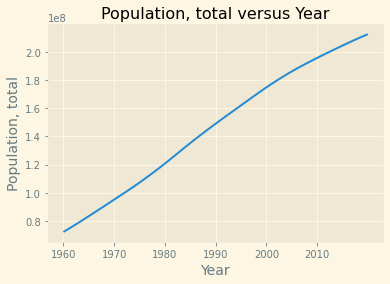

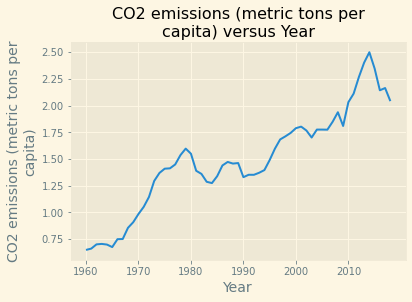

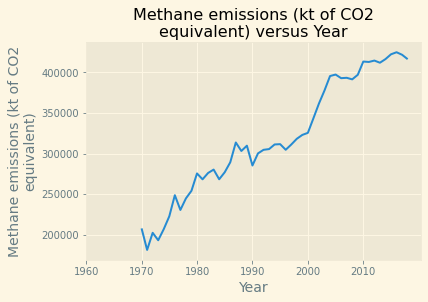

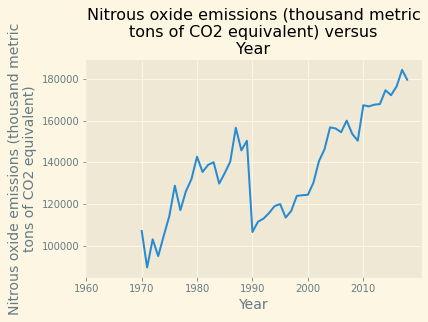

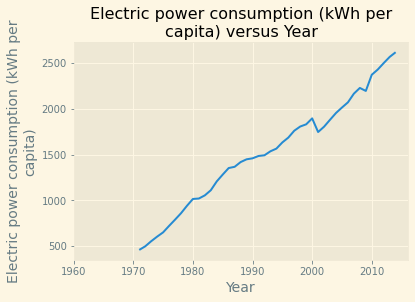

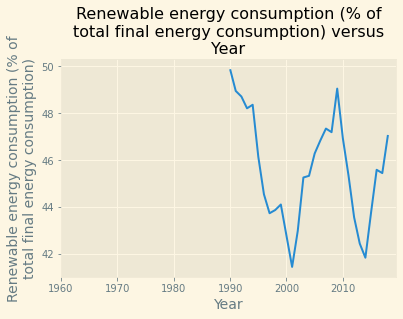

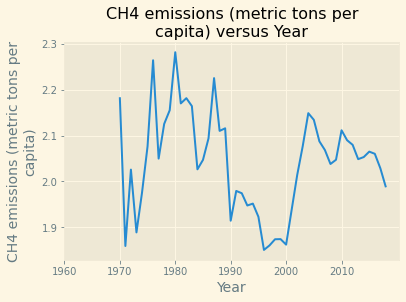

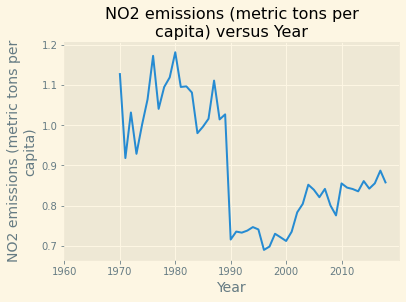

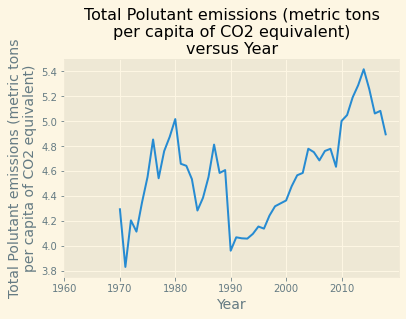

In [ ]:
# copia eixo de tempo (anos):
df['ano (str)'] = df.index

# Converte eixo de tempo (string) em inteiros ou NaN:
df['ano (int)'] = pd.to_numeric(df['ano (str)'], errors='coerce').fillna(0).astype('int')
df['ano (int)'].replace(0, np.nan, inplace=True)

# Remove index NaN:
df['ano (int)'].dropna()

# Encontra os limites da faixa de valores do eixo X:
xi = df['ano (int)'][0]
xf = df['ano (int)'][-2]

# plota as Colunas do Dataframe em função do ano:
for n in df.columns:
  if ((n == 'ano (int)') | (n == 'ano (str)')) == 1:
    pass
  else:
    with plt.style.context('Solarize_Light2'):
      
      plt.plot(df['ano (int)'], df[n] , linewidth=2.0)

      plt.title(formatar_titulo(n + ' versus Year'))

      plt.xlabel('Year', fontsize=14)
      plt.ylabel( formatar_titulo(n) , fontsize=14)
      
      time_step = 10 # years
      plt.xticks(list(range(int(xi), int(xf), time_step)))  # passo de tempo

      # figure(figsize=(8, 6), dpi=300)

    img_local = bd_local.replace('/BD','/Images')
    plt.savefig(os.path.join( img_local , n  + ' versus Year'), dpi=300, bbox_inches='tight')
    plt.show()


### **Gráficos de dois eixos**

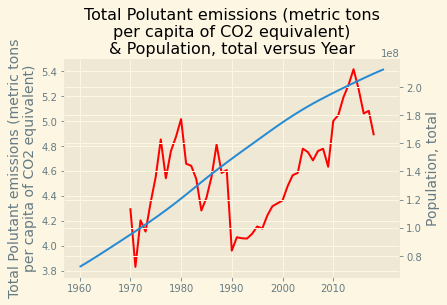

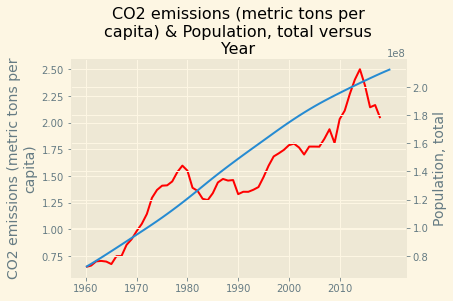

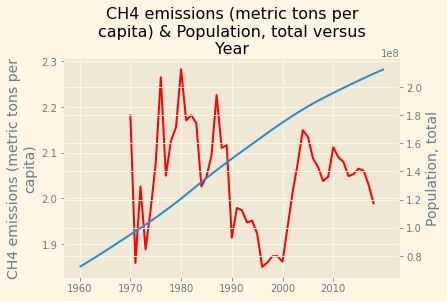

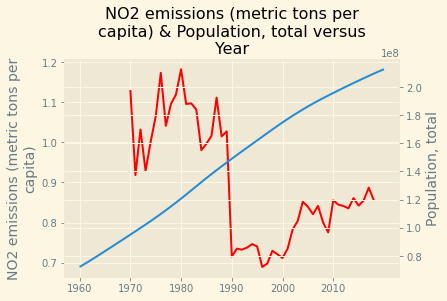

In [ ]:
for i in comp_list_2y:

  # plota duas colunas do Dataframe em função do ano:
  with plt.style.context('Solarize_Light2'):

    figure, left_ax = plt.subplots()
    left_ax.plot(df['ano (int)'], df[i[0]], linewidth=2.0, color='red')
    left_ax.set_ylabel( formatar_titulo(i[0]) , fontsize=14)

    right_ax = left_ax.twinx()
    right_ax.plot(df['ano (int)'], df[i[1]], linewidth=2.0)
    right_ax.set_ylabel( formatar_titulo(i[1]) , fontsize=14)

    plt.xlabel('Year', fontsize=14)
    
    n = i[0] + ' & ' + i[1]
    plt.title(formatar_titulo(n + ' versus Year'))


    time_step = 10 # years
    plt.xticks(list(range(int(xi), int(xf), time_step)))  # passo de tempo

    # figure(figsize=(8, 6), dpi=300)

  img_local = bd_local.replace('/BD','/Images')
  plt.savefig(os.path.join( img_local , n  + ' versus Year'), dpi=300, bbox_inches='tight')
  plt.show()


##**Geração de Relatório**

In [ ]:
# Gera um relatório em PS LaTeX

relatorio_LaTeX = r"""


\documentclass[12pt, a4paper, hidelinks]{article}

% Language
\usepackage[brazil]{babel}
\usepackage[utf8]{inputenc}

% Page formating
\usepackage[left=20mm, right=20mm, top=30mm, bottom=20mm]{geometry}
\usepackage[toc,page, title, titletoc]{appendix}

% Tables
\usepackage{booktabs}
\usepackage{multicol}
\usepackage{multirow}
\usepackage[table,xcdraw]{xcolor}

% Figures
\usepackage{graphicx}
\usepackage{adjustbox}
\usepackage{caption}
\usepackage{subcaption}
\usepackage{float}

% Colors
\usepackage[svgnames]{xcolor}

% Math
\usepackage{amsmath}
\usepackage{amssymb}
\usepackage{amsfonts}
\usepackage{mathtools}

% Text formatting
\usepackage{indentfirst}
\usepackage{microtype}
\usepackage{titlesec}
\usepackage{hyperref}
\edef\svtheparindent{\the\parindent}
\usepackage{parskip}
\parindent=\svtheparindent\relax
\usepackage{setspace}
\usepackage[framed,numbered,autolinebreaks,useliterate]{mcode}

\titleformat*{\section}{\large\bfseries}
\titleformat*{\subsection}{\normalsize\bfseries}
\titleformat*{\subsubsection}{\normalsize\it}
\titleformat*{\paragraph}{\normalsize\it}
\titleformat*{\subparagraph}{\normalsize\it}

% Fonts
\usepackage{lmodern}
\usepackage[T1]{fontenc}
%\usepackage{libertine}
%\usepackage{libertinust1math}
%\usepackage[T1]{fontenc}
%\usepackage{lmodern}
%\usepackage[T1]{fontenc}
%\renewcommand*\familydefault{\sfdefault}

% Bibliography
\usepackage{natbib}

% A mais (inserido pelo luca)
\usepackage{verbatim}
\usepackage{fancyhdr}
\usepackage{xurl}
\usepackage{enumitem}% http://ctan.org/pkg/enumitem
\usepackage{color,soul}
\usepackage{xcolor,colortbl}
\usepackage[default,scale=0.7]{opensans}
\usepackage[11pt]{moresize}
\usepackage{nicematrix}
\usepackage{makecell}
\usepackage{tabu}

\definecolor{azul1edit}{HTML}{191970}
\definecolor{azul2edit}{HTML}{191970}
\definecolor{azul3edit}{HTML}{191970}
\definecolor{azul4edit}{HTML}{191970}
\definecolor{azul5edit}{HTML}{002060}
\definecolor{cinza1edit}{HTML}{404040}
\definecolor{cinza2edit}{HTML}{595959}
\definecolor{cinza3edit}{HTML}{bfbfbf}
\definecolor{cinza4edit}{HTML}{9c9c9c}

\usepackage{wallpaper}
\usepackage{array,tabularx}

\def\mydate{\leavevmode\hbox{\twodigits\day/\twodigits\month/\the\year}}
\def\twodigits#1{\ifnum#1<10 0\fi\the#1}




\pagestyle{fancy}
\fancyhf{}
%\rhead{\leftmark}
\rfoot{Página \thepage}


\documentclass{article}
\usepackage[utf8]{inputenc}

\title{Relatório automático - Matrizes Energéticas BR}
\author{Luca Martins Marini }
\date{April 2022}

\begin{document}

\maketitle

\section{Introduction}

Este documento é um exemplo de relatório que pode ser gerado automaticamente através da linguagem Python aliada à linguagem LaTeX e não representa uma pesquisa formal, sendo somente um treino de programação pessoal. 

\section{Resultados}

Apresenta-se uma tabela a seguir, representando a quantidade de

      \begin{table}[H]
          \begin{center}

            \caption{\color{azul2edit} Dados do Erro de Malha de Pressão de Fornalha (mmCA) C05 }

              \begin{tabular}{ c!{\color{cinza4edit}\vrule}c!{\color{cinza4edit}\vrule}c!{\color{cinza4edit}\vrule}c!{\color{cinza4edit}\vrule}c!{\color{cinza4edit}\vrule}} 

                  \arrayrulecolor{cinza4edit}\hline
                  \rowcolor{azul1edit}\textbf{\color{white}Variável de Processo} & \textbf{\color{white} Unidade} & \textbf{\color{white} Média} & \textbf{\color{white} Mediana}  & \textbf{\color{white} Desvio Padrão}   \\
                  \hline
                  Erro de Malha de Pressão de Fornalha  C05 & mmCA & 1.11 & 0.09 & 1.72 \\
                  \hline
                  
                  \end{tabular}
                  
                  \label{table:estatperfilerro_13}
          \end{center}
      \end{table}             
                  
      
            \begin{table}[H]
          \begin{center}

            \caption{\color{azul2edit} Dados de Malha de Pressão de Fornalha (mmCA) C05 para o período analisado}

              \begin{tabular}{ c p{0.5cm}c!{\color{cinza4edit}\vrule}c!{\color{cinza4edit}\vrule} } 

                  \arrayrulecolor{cinza4edit}\cline{3-4}
                  \multirow{6}{*}{\includegraphics[width=8cm]{Imagens/Foto.png}} & \multicolumn{1}{c|}{ } & \cellcolor{azul1edit}\textbf{\color{white}Indicador} & \cellcolor{azul1edit}\textbf{\color{white}Valor} \\
                  \cline{3-4}
                  & \multicolumn{1}{c|}{ }  &  Média & -5.73\\
                  \cline{3-4}
                  & \multicolumn{1}{c|}{ }  &  Mediana & -5.64\\
                  \cline{3-4}
                  & \multicolumn{1}{c|}{ }  &  Desvio Padrão & 2.0\\
                  \cline{3-4}
                   & \multicolumn{1}{c|}{ }  &  Variabilidade & 34.88 \% \\
                   \cline{3-4}
                  & \multicolumn{2}{c}{ }\\[2.2cm]
                  
                  
                  \end{tabular}
                  
                  \label{table:comp_on_off_16}
          \end{center}
      \end{table}    

\end{document}


"""

file = open('/content/drive/MyDrive/..Python Codes/Projeto Dashboard Matriz Energética/Relatório/Relatorio.tex', 'w')
file.write(relatorio_LaTeX)
file.close()
file = open('/content/drive/MyDrive/..Python Codes/Projeto Dashboard Matriz Energética/Relatório/Relatorio.txt', 'w')
file.write(relatorio_LaTeX)
file.close()




In [ ]:
teste = r"""

\documentclass[a4paper]{book}
\usepackage{pgfplots}
\pgfplotsset{compat=1.10}

\usepackage[utf8]{inputenc}



\title{teste}
\author{lucamartins }
\date{April 2022}

\begin{document}

\maketitle

\clearpage
\section{parte 1}

\clearpage
\section{parte 2}

\clearpage
\section{parte 3}

\end{document}

"""
file = open('/content/drive/MyDrive/..Python Codes/Projeto Dashboard Matriz Energética/Relatorio.tex', 'w')
file.write(teste)
file.close()

file = open('/content/drive/MyDrive/..Python Codes/Projeto Dashboard Matriz Energética/Relatorio.txt', 'w')
file.write(teste)
file.close()

In [ ]:
# Transforma o .tex em pdf

########## transforma .tex em binary string
pdfl = PDFLaTeX.from_texfile('/content/drive/MyDrive/..Python Codes/Projeto Dashboard Matriz Energética/Relatorio.tex')
pdf, log, completed_process = pdfl.create_pdf(keep_pdf_file = True, keep_log_file = True)

########## transforma binary string em pdf
import base64, os
code = pdf
with open(os.path.expanduser('/content/drive/MyDrive/..Python Codes/Projeto Dashboard Matriz Energética/Relatorio.pdf'), 'wb') as fout:
  fout.write(base64.decodebytes(code))


In [ ]:
code

b'%PDF-1.5\n%\xd0\xd4\xc5\xd8\n6 0 obj\n<<\n/Length 140       \n/Filter /FlateDecode\n>>\nstream\nx\xda\x85\xce1\x0b\xc20\x14\x04\xe0\xbd\xbf\xe2\xc6v\xc83\xef%/MG\x05\x15\x9c\xb3\x89C\xd1*\x85*\xd2\xd6\xffo\x83n\x0eN\xb7|w\x9c\xc5\r\x16\xfb\xc2\xfe\xc9M*V;VpM\xc2\xea\x91\xae\x10U\xd2\xa0\xf01R\xac\x03\xd2\x05\xc7r\xee\xa6\xb9\xabN\xe9\xb0\xe8\x00fjT%k\xc3\x8e\xea 0\xdeQt_=\xbc\xce\xed\xbd\x1d\xe7\xfe1\xe5\x0e\x1c\xb1x\x18Y\x06\x1b\xfe\x90\xf5s\xec\x87\xca8\t\xa5X\x91\xcc~\xcemS\xf1\x06$\xe6-E\nendstream\nendobj\n13 0 obj\n<<\n/Length 113       \n/Filter /FlateDecode\n>>\nstream\nx\xdaU\x8c\xbd\x0e\xc20\x0c\x06\xf7<\xc57&C\\\xdb\xa9\x93vE\xa2H\xcc\xde*\x06$~VT\xf1\xfej+``\xba\xe5\xee\x18O0N\xe1\xe0\xa1\x9b\x06\x8c4V\xad\xf0\x07\xc4\x98\x1a\x1bZ1b\x15\xf8\rs\xd4t\xf1s\xe0o\xd3M\x9b*=\x95\xbe\xea\x9e0\xb2\xb6mP>2\x93\xa4,\xa2\x16_\xd7\xe5}O\xb94\x8b\xf2w\xf8\xf1\xe8a\x05\xb2\xd9\x1c\xdc\nendstream\nendobj\n18 0 obj\n<<\n/Length 146       \n/Filter /FlateDecode\n>>\nstream\nx\xdaM\xcd\xb1

In [ ]:
# RASCUNHO PRA VER COMO UM PDF FUNCIONAL FICA EM BINARY STRING


with open("/content/drive/MyDrive/..Python Codes/Projeto Dashboard Matriz Energética/Relatorio.pdf", "rb") as pdf_file:
  encoded_string = base64.b64encode(pdf_file.read())


print(encoded_string)

b'PDF1560obj/Length140/Filter/FlateDecodestreamx10v3/MGConNwMVVpMU1RrNfjTk0Qs='


In [ ]:
# RASCUNHO

file = open('/content/drive/MyDrive/..Python Codes/Projeto Dashboard Matriz Energética/Relatorio.pdf', 'wb')
file.write(code)
file.close()

AttributeError: ignored

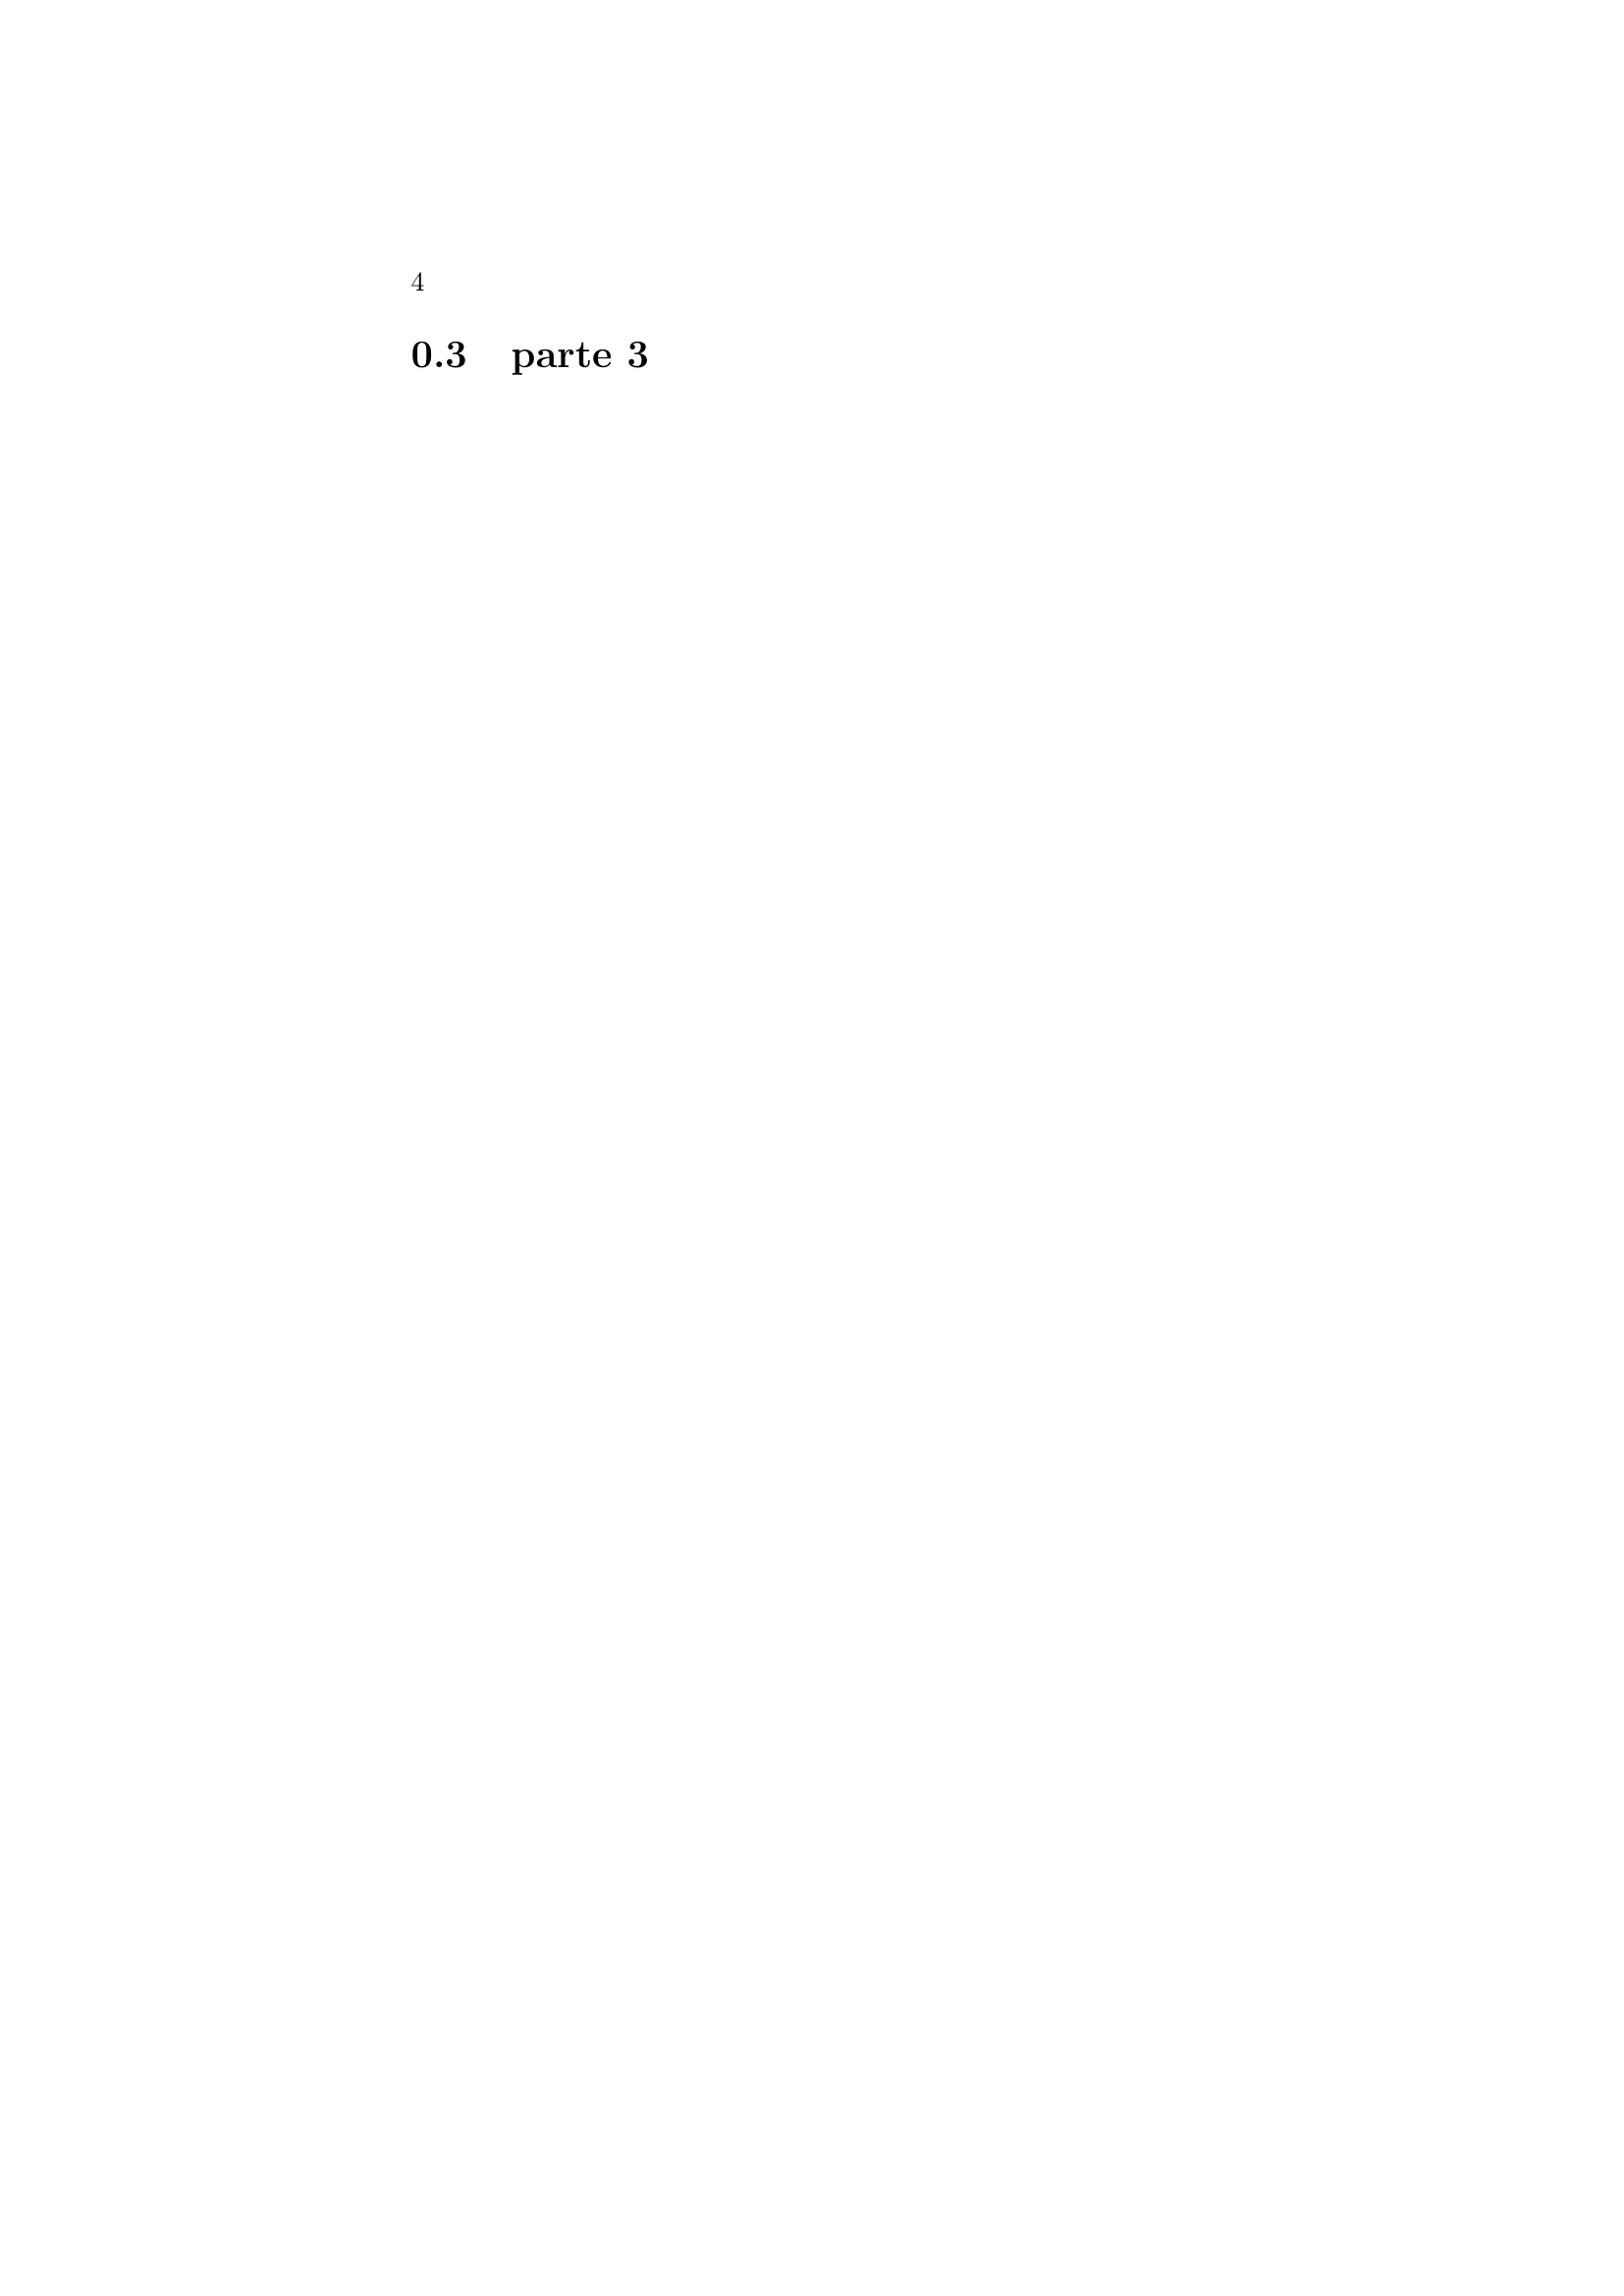

In [ ]:
# Faz display do pdf gerado

images = convert_from_path("/content/drive/MyDrive/..Python Codes/Projeto Dashboard Matriz Energética/Relatorio.pdf")
for i, image in enumerate(images):    
    fname = "image" + str(i) + ".png"
    image.save(fname, "PNG")
Image(fname, width=700, height=1200)


## **Envio automático de email**

In [ ]:
# Envia informação via gmail
import smtplib
import email.message
def enviar_email(): 
  corpo_email = """testando envio de email automatico"""

  msg = email.message.Message()
  msg['Subject'] = 'Assunto de email'
  msg['From'] = 'fimdalinha666@gmail.com'
  msg['To'] = 'lucammarini@gmail.com'
  password = '260698adriana'
  msg.add_header('Content-Type', 'text/html')
  msg.set_payload(corpo_email)

  # Anexando o PDF
  # pdfname='/content/drive/MyDrive/..Python Codes/Projeto Dashboard Matriz Energética/Relatorio.pdf'
  # fp=open(pdfname,'rb')
  # anexo = email.mime.application.MIMEApplication(fp.read(),_subtype="pdf")
  # fp.close()
  # anexo.add_header('Content-Disposition','attachment',filename=pdfname)
  # msg.attach(anexo)

  s = smtplib.SMTP('smtp.gmail.com: 587')
  s.starttls()
  # Login Credentials for sending the mail
  s.login(msg['From'], password)
  s.sendmail(msg['From'], [msg['To']], msg.as_string().encode('utf-8'))
  print('Email enviado')

enviar_email()

Email enviado


## **Fim do código**

In [ ]:
end_script = time.time()
print('Tempo do script {:.2f} segundos'.format((end_script - start_script)))

Tempo do script 54.62 segundos
